In [94]:
import numpy as np

In [95]:
class DualNumber:
    def __init__(self, real, dual):
        self.real = real
        self.dual = dual

    def __toDual(self,other):
        if isinstance(other, DualNumber): return other
        return DualNumber(other,0)
        
        
    def __add__(self, other1):
        other = self.__toDual(other1)
        return DualNumber(self.real + other.real,
                          self.dual + other.dual)
    __radd__ = __add__

    def __sub__(self, other1):
        other = self.__toDual(other1)
        return DualNumber(self.real - other.real,
                          self.dual - other.dual)

    def __rsub__(self, other):
        return DualNumber(other, 0) - self

    def __mul__(self, other1):
        if isinstance(other1,ComplexDualNumber): return other1.__rmul__(self)
        other = self.__toDual(other1)
        return DualNumber(self.real * other.real,
                          self.real * other.dual + self.dual * other.real)

    __rmul__ = __mul__

    def __truediv__(self, other1):
        other = self.__toDual(other1)
        return DualNumber(self.real/other.real,
                          (self.dual*other.real - self.real*other.dual)/(other.real**2))

    def __rtruediv__(self, other1):
        other = self.__toDual(other1)
        return other/self

    def __pow__(self, other):
        return DualNumber(self.real**other,
                          self.dual * other * self.real**(other - 1))

    def __repr__(self):
        return repr(self.real) + ' + ' + repr(self.dual) + '*'+'\u03B5'

In [96]:
DualNumber(0,10)

0 + 10*ε

In [97]:
DualNumber(0,10)*DualNumber(0,10)

0 + 0*ε

In [98]:
DualNumber(1,10)**5

1 + 50*ε

In [99]:
DualNumber(1,10)/DualNumber(1,10)

1.0 + 0.0*ε

In [108]:
A = DualNumber(1,10)
B = DualNumber(0,10)
A*B
B**2

0 + 0*ε

In [116]:
class ComplexDualNumber:
    def __init__(self, real,imag, dual,imdual):
        self.real = real
        self.imag = imag
        self.dual = dual
        self.imdual = imdual

    def __toComplexDual(self,other):
            if isinstance(other, ComplexDualNumber):
                return other
            elif isinstance(other,type(complex('j'))):
                return ComplexDualNumber(other.real, other.imag,0,0)
            elif isinstance(other,DualNumber):
                return ComplexDualNumber(other.real,0, other.dual,0)
            return ComplexDualNumber(self.real + other,self.imag, self.dual,self.imdual)
        
        
    def __add__(self, other1):
        other = self.__toComplexDual(other1)
        return ComplexDualNumber(self.real + other.real,
                          self.imag + other.imag,
                          self.dual + other.dual,
                          self.imdual + other.imdual
                         )
    __radd__ = __add__

    def __sub__(self, other1):
        other = self.__toComplexDual(other1)
        return ComplexDualNumber(self.real - other.real,
                          self.imag - other.imag,
                          self.dual - other.dual,
                          self.imdual - other.imdual
                         )

    def __rsub__(self, other1):
        other = self.__toComplexDual(other1)
        return other - self

    def __mul__(self, other1):        
        other = self.__toComplexDual(other1)
        return ComplexDualNumber(
                self.real * other.real - self.imag * other.imag,
                self.real * other.imag + self.imag * other.real,
                self.dual*other.real + self.imdual*other.imag + self.real*other.dual - self.imag*other.imdual,
                self.imdual*other.real - self.dual*other.imag + self.imag*other.dual + self.real*other.imdual
                )
    __rmul__ = __mul__

    def __pow__(self, other):
        if isinstance(other,int) and other>0:
            new = self
            for i in range(1,other):
                new = self*new
            return new

    def conjugate(self):
        return ComplexDualNumber(self.real,-self.imag,-self.dual,-self.imdual)
        
    def __repr__(self):
        return repr(self.real) + ' + ' + repr(self.imag)+'i'+' + ' +repr(self.dual) + '\u03B5' +' + ' + repr(self.imdual) +'i\u03B5'

In [101]:
ComplexDualNumber(1,0,3,4)*ComplexDualNumber(1,0,4,3)

1 + 0i + 7ε + 7iε

https://www.euclideanspace.com/maths/algebra/realNormedAlgebra/other/dualComplex/index.htm

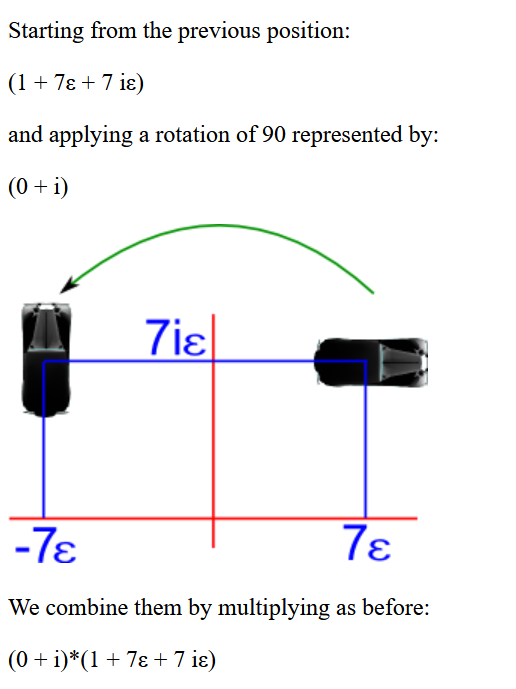

In [109]:
ComplexDualNumber(0,1,0,0)*ComplexDualNumber(1,0,7,7)

0 + 1i + -7ε + 7iε

In [89]:
ComplexDualNumber(1,0,7,7)*DualNumber(1,10)

1 + 0i + 17ε + 7iε

In [90]:
DualNumber(1,10)*ComplexDualNumber(1,0,7,7)

1 + 0i + 17ε + 7iε

In [88]:
ComplexDualNumber(1,0,7,7)*ComplexDualNumber(1,0,10,0)

1 + 0i + 17ε + 7iε

In [117]:
ComplexDualNumber(1,0,10,0).conjugate()

1 + 0i + -10ε + 0iε

In [122]:
def cdToPt(cd):
    x = cd.dual
    y = cd.imdual
    return np.array([x,y])

def ptToCd(pt):
    return ComplexDualNumber(1,0,pt[0],pt[1])

def CDRotateAngle(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return ComplexDualNumber(c,s,0,0)

def CDTranslate(D):
    return ComplexDualNumber(1,0,D[0],D[1])


In [123]:
cdToPt(ComplexDualNumber(1,0,7,7))

array([7, 7])

In [124]:
ptToCd((7,7))

1 + 0i + 7ε + 7iε

In [129]:
CDRotateAngle(np.pi/2)*ptToCd((7,7))

6.123233995736766e-17 + 1.0i + -7.0ε + 7.0iε

In [178]:
def CDRotateAroundPoint(theta,D):
    d = np.array(D)
    T = CDTranslate(d)
    Tinv = CDTranslate(-d)
    R = CDRotateAngle(theta)
    return T*R*Tinv

In [198]:
theta = np.pi
D = [4,0]
CDRotateAroundPoint(theta,D)

-1.0 + 1.2246467991473532e-16i + 0.0ε + -9.797174393178826e-16iε

In [199]:
CDRotateAroundPoint(theta,D)*ptToCd((10,0))

-1.0 + 1.2246467991473532e-16i + -10.0ε + 2.449293598294707e-16iε

In [186]:
np.sin(np.pi/2)

1.0